In [37]:
import webdataset as wds
import matplotlib.pyplot as plt

In [150]:
path = '/f_data/G/dataset/laion-coco/laion-coco/{00000..00001}.tar'
dataset = wds.WebDataset(path).shuffle(1000).decode("pil").to_tuple("jpg", "txt")

In [151]:
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
transform = transforms.Compose(
            [
                transforms.RandomResizedCrop(224, scale=(0.9, 1.0), interpolation=InterpolationMode.BICUBIC),
                transforms.ToTensor(),
                transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
            ]
        )
def preprocess(sample):
    image, caption = sample
#     image = transform(image)
    return image, caption

In [152]:
dataset = dataset.map(preprocess)

In [156]:
for image, caption in dataset:
    break

In [157]:
caption  

'An airplane is sitting on the runway ready to take off.'

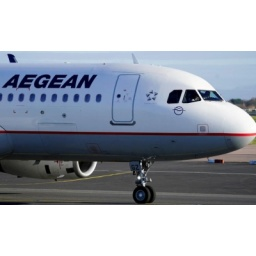

In [158]:
image

In [138]:
from torch.utils.data import Dataset, SequentialSampler, DataLoader
data = DataLoader(dataset, batch_size=64, num_workers=8)

In [139]:
for images, captions in data:
    print(captions)
    break

('The white truck is parked on the side of the road.', 'a skf logo on a white background', 'The man is smoking and wearing an army uniform.', 'The hand is holding a bouquet of pink roses.', 'A man laying on top of an exercise table.', 'Metallique wax in a tin on a white background.', 'Three different colored rings with diamonds.', 'A bedroom with a bed, chair, couch and two lamps.', 'The cover of Holzwerken magazine.', 'A white dining table with black chairs.', 'The hand is holding an anti - fingerprint glass screen protector.', 'An awning over the outside patio table.', 'THE RED DEAD REDEMPTION II. XBOX One', 'The new tab in Powerpoint is highlighted.', 'Three green parrots perched on branches in the sun pendant.', 'An older man wearing glasses and a suit.', 'a table with four stools and some pictures', 'the cover to call duty modern warfare.', 'The backlit keyboard is illuminated in black.', 'An iPad with the text How To Lock an iPad and iPhone screen, so kids stay within the iPad.',

# test LAION-2B

In [159]:
path = '/f_data/G/dataset/laion-2b-en/laion2B-en/{00000..00001}.tar'
dataset = wds.WebDataset(path).shuffle(1000).decode("pil").to_tuple("jpg", "txt")

In [160]:
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
transform = transforms.Compose(
            [
                transforms.RandomResizedCrop(224, scale=(0.9, 1.0), interpolation=InterpolationMode.BICUBIC),
                transforms.ToTensor(),
                transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
            ]
        )
def preprocess(sample):
    image, caption = sample
#     image = transform(image)
    return image, caption

In [180]:
dataset = dataset.map(preprocess)

In [181]:
for image, caption in dataset:
    break

In [182]:
caption  

'The Simpsons - Butterfinger Commercial Collection (1989 - 2001)'

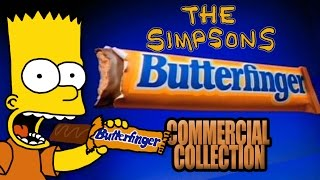

In [183]:
image